In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import researchpy as rp

## This is version 2 of the Data Analysis which is the modified from version 1 after receiving feedback from the professor. Use this to write the paper. I use some results from version 1 but I have briefly explained them here in the text sections similar to this one.

In [108]:
# data01 -> only ratings data
data01 = pd.read_csv(r"datasets/pilot2_ratingsonly.csv")
data01 = data01.sort_values(by=['ratingType'])
print(data01.columns)
data01.head()

Index(['__id__', 'category', 'id', 'itemRated', 'rateValue', 'ratingType'], dtype='object')


,__id__,category,id,itemRated,rateValue,ratingType
124,bgfvNksA6WXTsONwvKa5,1,p0zZyYruhD5277icLVX4,cat1item1,4.4,5-point slider
111,XGlTSqQDqqBoAugsmn68,2,KlKH4KuZOTZOvtk6EXDQ,cat2item3,5.0,5-point slider
113,YDZN6L7pExYjLp784h6U,2,w3QGAMNmWEe2Mi5BGHYD,cat2item3,2.0,5-point slider
63,JNYr9B9Fe9eLQ0vRSHAI,1,UDuTNpSDVW6D56G7wWfc,cat1item1,5.0,5-point slider
186,uVa0WPpiZYmTeWmv6CGi,1,GJ4oSmgQiO2szWPlGMIX,cat1item1,4.5,5-point slider


In [109]:
# data02 -> combined data
data02 = pd.read_csv(r"datasets/pilot2_combined.csv")
data02 = data02.sort_values(by=['ratingType'])
print(data02.columns)
data02.head()

Index(['__id__', 'birthYear', 'citySize', 'culturalBackground', 'education',
       'gender', 'gender2', 'id', 'internetExperience', 'internetFrequency',
       'internetSkill', 'item1ratevalue', 'item2ratevalue', 'mturkID',
       'nationality', 'occupation', 'ratingType'],
      dtype='object')


,__id__,birthYear,citySize,culturalBackground,education,gender,gender2,id,internetExperience,internetFrequency,internetSkill,item1ratevalue,item2ratevalue,mturkID,nationality,occupation,ratingType
49,TuIkRODRymvQXZzdmjxb,1988,Small,"[""European""]",3,female,-,TuIkRODRymvQXZzdmjxb,high,daily,65,1.5,1.5,A11WCFPJSR5VZP,american,25,5-point slider
25,GJ4oSmgQiO2szWPlGMIX,1999,Large,"[""European""]",3,male,-,GJ4oSmgQiO2szWPlGMIX,high,daily,71,4.5,5.0,A28OD52SMLYQ16,american,44,5-point slider
73,f1Rek1hsLhRa5I3Wewzl,1992,Small,"[""European""]",3,male,-,f1Rek1hsLhRa5I3Wewzl,medium,occasionally,53,5.0,3.4,A23535U1INRJPK,american,6,5-point slider
27,H6mczfISMYhzAHqJfOpG,1991,Small,"[""European""]",2,male,-,H6mczfISMYhzAHqJfOpG,high,daily,48,4.5,4.0,A1QQMK1LUKWCFL,american,60,5-point slider
29,IQMeQXE8zVzYVKk49cZy,1992,Medium,"[""Hispanic""]",1,male,-,IQMeQXE8zVzYVKk49cZy,medium,occasionally,52,5.0,4.9,A3REPTAHMY4QO,american,4,5-point slider


In [110]:
data02['item1ratevalue_m'] = data02['item1ratevalue'].round(0)
data02['item2ratevalue_m'] = data02['item2ratevalue'].round(0)
data02.tail()

,__id__,birthYear,citySize,culturalBackground,education,gender,gender2,id,internetExperience,internetFrequency,internetSkill,item1ratevalue,item2ratevalue,mturkID,nationality,occupation,ratingType,item1ratevalue_m,item2ratevalue_m
26,Gp3XxLMFGhkGSLhBxvsp,1990,Small,"[""Hispanic""]",2,male,-,Gp3XxLMFGhkGSLhBxvsp,none,daily,67,5.0,5.0,A38GAOZ7BJ2AQ6,american,11,Emoji,5.0,5.0
23,FTORYwWV33Ae1mVH86Jp,1992,Small,"[""Southeast Asian""]",2,male,-,FTORYwWV33Ae1mVH86Jp,low,occasionally,45,4.0,4.0,A8AEFZTMDVN0Z,american,2,Emoji,4.0,4.0
98,yL9haTlABXM2QdeCLr3v,1987,Large,"[""Hispanic""]",3,female,-,yL9haTlABXM2QdeCLr3v,medium,daily,53,4.0,4.0,A2UUQCYLT4WPAT,american,42,Emoji,4.0,4.0
79,o76R2Y45ZlzzEwgfyKxj,1990,Small,"[""Hispanic""]",3,male,-,o76R2Y45ZlzzEwgfyKxj,low,daily,66,5.0,5.0,A7ZTU5G23PGDQ,american,28,Emoji,5.0,5.0
99,zHN3WnCEo2IPVx3S2EdA,1990,Medium,"[""Hispanic""]",3,male,-,zHN3WnCEo2IPVx3S2EdA,low,daily,52,3.0,4.0,A1P2XKONWAOXHP,american,6,Emoji,3.0,4.0


## 1. Age categorized into 3 categories for ease of testing
## 2. internetExperience and internetFrequency are correlated with internetSkill(completed ## in version 1 of data analysis). So these three are combined into IT_Skill_Level. IT_Skill_Level is divided into 3 categories. (see below)
## 3. The following demographic data has been collected 1)age, 2)gender, 3)citysize, 4)ethnicty/cultural background, 5)education, 6)internetFrequency, 7)internetExperience, 8)internetSkill, 9)nationality, 10)occupation. 
## 4. Of these age, gender, citysize, education, and IT_Skill_Level are relevant. Rest are irrelevant and pointless and do not influence the ratings.(version 1)

In [111]:
conditions = [
    (data02['birthYear']>=1997),
    (data02['birthYear']>=1967) & (data02['birthYear']<1997),
    (data02['birthYear']<1967)
]
values = ['young', 'middle-aged','senior']
data02['ageGroup'] = np.select(conditions, values)

In [112]:
conditions_2 = [
    (data02['internetSkill']>60),
    (data02['internetSkill']>=51) & (data02['internetSkill']<=60),
    (data02['internetSkill']>=33) & (data02['internetSkill']<=50)
]
values_2 = ['Expert', 'intermediate','beginner']
data02['IT_Skill_level'] = np.select(conditions_2, values_2)

In [113]:
#new =data02.copy()
#old =data02.copy()
#new = old.drop('B', axis=1)

item1 = data02.loc[:, data02.columns != 'item2ratevalue_m']
item2 = data02.loc[:, data02.columns != 'item1ratevalue_m']
item1 = item1.rename(columns={'item1ratevalue_m': 'MergedRating'})
item2 = item2.rename(columns={'item2ratevalue_m': 'MergedRating'})
#item1
#item2
frames = [item1, item2]
result = pd.concat(frames)
data02 = result
data02
# data02 : Merged on Ratings

,__id__,birthYear,citySize,culturalBackground,education,gender,gender2,id,internetExperience,internetFrequency,internetSkill,item1ratevalue,item2ratevalue,mturkID,nationality,occupation,ratingType,MergedRating,ageGroup,IT_Skill_level
49,TuIkRODRymvQXZzdmjxb,1988,Small,"[""European""]",3,female,-,TuIkRODRymvQXZzdmjxb,high,daily,65,1.5,1.5,A11WCFPJSR5VZP,american,25,5-point slider,2.0,middle-aged,Expert
25,GJ4oSmgQiO2szWPlGMIX,1999,Large,"[""European""]",3,male,-,GJ4oSmgQiO2szWPlGMIX,high,daily,71,4.5,5.0,A28OD52SMLYQ16,american,44,5-point slider,4.0,young,Expert
73,f1Rek1hsLhRa5I3Wewzl,1992,Small,"[""European""]",3,male,-,f1Rek1hsLhRa5I3Wewzl,medium,occasionally,53,5.0,3.4,A23535U1INRJPK,american,6,5-point slider,5.0,middle-aged,intermediate
27,H6mczfISMYhzAHqJfOpG,1991,Small,"[""European""]",2,male,-,H6mczfISMYhzAHqJfOpG,high,daily,48,4.5,4.0,A1QQMK1LUKWCFL,american,60,5-point slider,4.0,middle-aged,beginner
29,IQMeQXE8zVzYVKk49cZy,1992,Medium,"[""Hispanic""]",1,male,-,IQMeQXE8zVzYVKk49cZy,medium,occasionally,52,5.0,4.9,A3REPTAHMY4QO,american,4,5-point slider,5.0,middle-aged,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Gp3XxLMFGhkGSLhBxvsp,1990,Small,"[""Hispanic""]",2,male,-,Gp3XxLMFGhkGSLhBxvsp,none,daily,67,5.0,5.0,A38GAOZ7BJ2AQ6,american,11,Emoji,5.0,middle-aged,Expert
23,FTORYwWV33Ae1mVH86Jp,1992,Small,"[""Southeast Asian""]",2,male,-,FTORYwWV33Ae1mVH86Jp,low,occasionally,45,4.0,4.0,A8AEFZTMDVN0Z,american,2,Emoji,4.0,middle-aged,beginner
98,yL9haTlABXM2QdeCLr3v,1987,Large,"[""Hispanic""]",3,female,-,yL9haTlABXM2QdeCLr3v,medium,daily,53,4.0,4.0,A2UUQCYLT4WPAT,american,42,Emoji,4.0,middle-aged,intermediate
79,o76R2Y45ZlzzEwgfyKxj,1990,Small,"[""Hispanic""]",3,male,-,o76R2Y45ZlzzEwgfyKxj,low,daily,66,5.0,5.0,A7ZTU5G23PGDQ,american,28,Emoji,5.0,middle-aged,Expert


In [114]:
data02_emoji = data02.loc[data02['ratingType'] == 'Emoji']
data02_star = data02.loc[data02['ratingType'] == '5-star']
data02_slider = data02.loc[data02['ratingType'] == '5-point slider']

In [118]:
#data02_emoji

In [119]:
count1=len(data02_emoji)
count2=len(data02_star)
count3=len(data02_slider)

In [120]:
print(data02_emoji.shape)
print(data02_star.shape)
print(data02_slider.shape)

(66, 20)
(60, 20)
(74, 20)


In [121]:
data01_emoji = data01.loc[data01['ratingType'] == 'Emoji']
data01_star = data01.loc[data01['ratingType'] == '5-star']
data01_slider = data01.loc[data01['ratingType'] == '5-point slider']

In [122]:
print(data01_emoji.shape)
print(data01_star.shape)
print(data01_slider.shape)

(68, 6)
(64, 6)
(76, 6)


## Bartlett's test: Null Hypothesis - Homegeneity of variances. (look this up)
## p-value (0.008)< 0.05 so we reject the null hypothesis 

In [125]:
test_statistic, p_value = stats.bartlett(data01_emoji['rateValue'],data01_star['rateValue'],data01_slider['rateValue'],)
  
print(test_statistic, p_value)

9.663030192815802 0.007974430078244327


In [126]:
# NR 
l1 = list(data01_emoji['rateValue'])
l2 = list(data01_star['rateValue'])
l3 = list(data01_slider['rateValue'])

test_statistic, p_value = stats.bartlett(l1,l2,l3)
print(test_statistic, p_value)

9.663030192815866 0.00797443007824407


In [127]:
#Emoji 
print('Emoji Rating System - Mean = ')
print(np.mean(l1))
print('Emoji Rating System - Standard Deviation = ')
print(np.std(l1))
print('Emoji Rating System - Variance = ')
print(np.var(l1))

Emoji Rating System - Mean = 
4.205882352941177
Emoji Rating System - Standard Deviation = 
0.9480447918403645
Emoji Rating System - Variance = 
0.8987889273356401


In [128]:
#5-star 
print('5-star Rating System - Mean = ')
print(np.mean(l2))
print('5-star Rating System - Standard Deviation = ')
print(np.std(l2))
print('5-star Rating System - Variance = ')
print(np.var(l2))

5-star Rating System - Mean = 
4.4375
5-star Rating System - Standard Deviation = 
0.6584783595532961
5-star Rating System - Variance = 
0.43359375


In [129]:
#5-point Slider
print('Slider Rating System - Mean = ')
print(np.mean(l3))
print('Slider Rating System - Standard Deviation = ')
print(np.std(l3))
print('Slider Rating System - Variance = ')
print(np.var(l3))

Slider Rating System - Mean = 
4.173684210526316
Slider Rating System - Standard Deviation = 
0.9248568055668532
Slider Rating System - Variance = 
0.8553601108033241


In [130]:
data02_emoji.head()
factors = ['ageGroup','citySize','education','gender','IT_Skill_level']
import statsmodels.stats.power as smp
smp.GofChisquarePower().power(0.25, 141, alpha=0.05,n_bins=4)

0.7011039732272182

## Power Calculation

### 1. Depends on Effect size, level of significance and degrees of freedom
### 2. Key takeaway we need atleast 300 participants per rating system to achive statistically significant results and have a power of 80%

In [143]:
print(smp.GofChisquarePower().power(0.25, 175, alpha=0.05,n_bins=4)*100)
print(smp.GofChisquarePower().power(0.235, 235, alpha=0.05,n_bins=6)*100)
print(smp.GofChisquarePower().power(0.22, 300, alpha=0.05,n_bins=8)*100)

80.13975436301915
80.53229740064324
80.55367823143705


## Chi-Square test and Effect Size Calculation

### Null Hypothesis: Factor and rating are independent.
### p-value < 0.05 we reject Null Hypothesis i.e factors influence the ratings
### Cramers' V or Effect size measures the extent of this influence 

In [152]:
#Emoji Rating System - Merged Ratings by Items
print('Emoji Rating System')
print()
for i in range(len(factors)):
    print('Merged Ratings')
    print(factors[i])
    contigency1= pd.crosstab(data02_emoji['MergedRating'], data02_emoji[factors[i]],normalize='columns')
    print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency1, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('Chi-statistic')
    print((c1))
    print('p-value')
    print(1-round(p1,3))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    if dof_1 >5:
        print(round(np.sqrt(c1/(count1*2)),2))
    else:
        print(round(np.sqrt(c1/(count1*1)),2))
    print('------------------------------')

Emoji Rating System

Merged Ratings
ageGroup
ageGroup      middle-aged  senior  young
MergedRating                            
1.0              0.033333     0.0    0.0
2.0              0.033333     0.0    0.0
3.0              0.100000     0.0    0.5
4.0              0.350000     0.5    0.5
5.0              0.483333     0.5    0.0
Chi-statistic
1.3587570621468927
p-value
0.0050000000000000044
degrees of freedom
8
Effect Size
0.1
------------------------------
Merged Ratings
citySize
citySize         Large  Medium     Small
MergedRating                            
1.0           0.000000  0.0625  0.000000
2.0           0.000000  0.0625  0.000000
3.0           0.000000  0.1250  0.136364
4.0           0.583333  0.3125  0.318182
5.0           0.416667  0.4375  0.545455
Chi-statistic
0.5202681908535388
p-value
0.0
degrees of freedom
8
Effect Size
0.06
------------------------------
Merged Ratings
education
education            2         3
MergedRating                    
1.0           0.04166

In [153]:
#5-star Rating System - Merged Ratings by Items
print('5-star Rating System')
print()
for i in range(len(factors)):
    print('Merged Ratings')
    print(factors[i])
    contigency1= pd.crosstab(data02_star['MergedRating'], data02_star[factors[i]],normalize='columns')
    print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency1, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('Chi-statistic')
    print((c1))
    print('p-value')
    print(1-round(p1,3))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    if dof_1 >5:
        print(round(np.sqrt(c1/(count2*2)),2))
    else:
        print(round(np.sqrt(c1/(count2*1)),2))
    print('------------------------------')

5-star Rating System

Merged Ratings
ageGroup
ageGroup      middle-aged  senior
MergedRating                     
2.0                  0.04     0.0
4.0                  0.42     0.7
5.0                  0.54     0.3
Chi-statistic
0.17857142857142858
p-value
0.08499999999999996
degrees of freedom
2
Effect Size
0.05
------------------------------
Merged Ratings
citySize
citySize         Large    Medium  Small
MergedRating                           
2.0           0.000000  0.045455    0.0
4.0           0.333333  0.500000    0.4
5.0           0.666667  0.454545    0.6
Chi-statistic
0.1661591168633422
p-value
0.0030000000000000027
degrees of freedom
4
Effect Size
0.05
------------------------------
Merged Ratings
education
education       1         2        3
MergedRating                        
2.0           0.0  0.000000  0.06250
4.0           0.5  0.444444  0.46875
5.0           0.5  0.555556  0.46875
Chi-statistic
0.13590189899984892
p-value
0.0020000000000000018
degrees of freedom
4
Ef

In [154]:
#5-point Slider Rating System - Merged Ratings by Items
print('5-point Slider Rating System')
print()
for i in range(len(factors)):
    print('Merged Ratings')
    print(factors[i])
    contigency1= pd.crosstab(data02_slider['MergedRating'], data02_slider[factors[i]],normalize='columns')
    print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency1, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('Chi-statistic')
    print((c1))
    print('p-value')
    print(1-round(p1,3))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    if dof_1 >5:
        print(round(np.sqrt(c1/(count3*2)),2))
    else:
        print(round(np.sqrt(c1/(count3*1)),2))
    print('------------------------------')

5-point Slider Rating System

Merged Ratings
ageGroup
ageGroup      middle-aged  senior     young
MergedRating                               
2.0              0.090909     0.0  0.000000
3.0              0.045455     0.0  0.000000
4.0              0.409091     1.0  0.833333
5.0              0.454545     0.0  0.166667
Chi-statistic
1.0318061964403427
p-value
0.016000000000000014
degrees of freedom
6
Effect Size
0.08
------------------------------
Merged Ratings
citySize
citySize      Large    Medium     Small
MergedRating                           
2.0             0.0  0.078947  0.115385
3.0             0.1  0.000000  0.076923
4.0             0.5  0.500000  0.384615
5.0             0.4  0.421053  0.423077
Chi-statistic
0.22040890858670892
p-value
0.0
degrees of freedom
6
Effect Size
0.04
------------------------------
Merged Ratings
education
education            1         2         3
MergedRating                              
2.0           0.000000  0.000000  0.107143
3.0           0.00

## Graphs 

### Emoji 

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

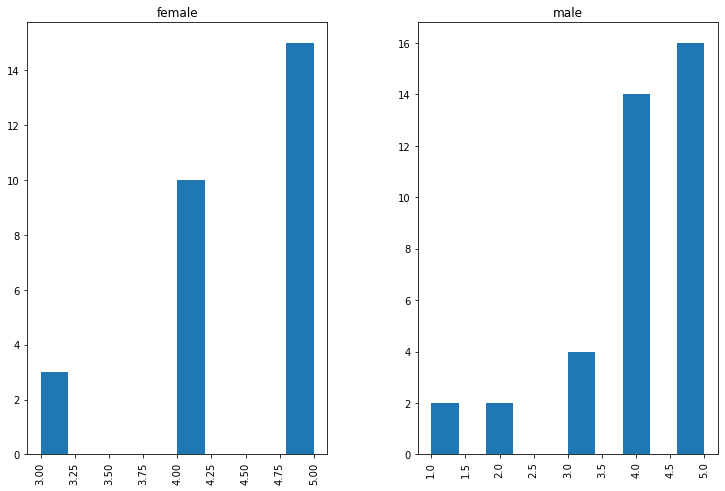

In [155]:
data02_emoji['MergedRating'].hist(by=data02_emoji['gender'], figsize=(12, 8))

array([[<AxesSubplot:title={'center':'middle-aged'}>,
        <AxesSubplot:title={'center':'senior'}>],
       [<AxesSubplot:title={'center':'young'}>, <AxesSubplot:>]],
      dtype=object)

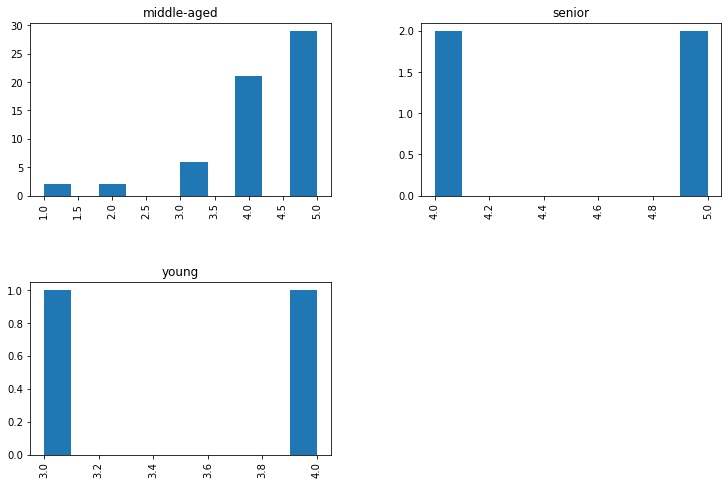

In [156]:
data02_emoji['MergedRating'].hist(by=data02_emoji['ageGroup'], figsize=(12, 8))

array([<AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>], dtype=object)

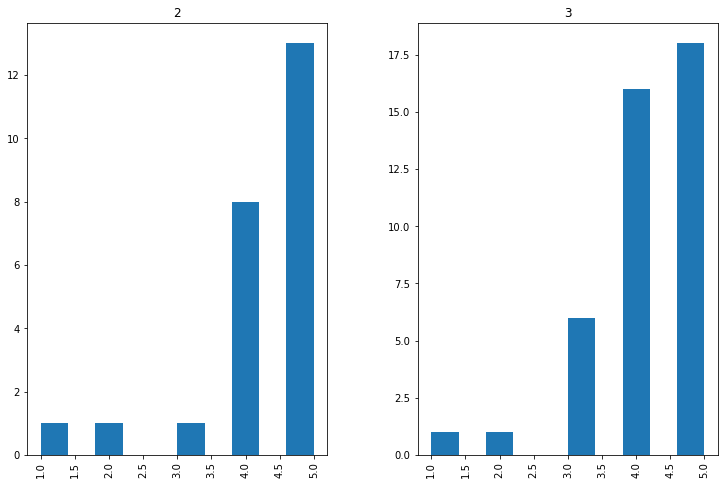

In [157]:
data02_emoji['MergedRating'].hist(by=data02_emoji['education'], figsize=(12, 8))

array([[<AxesSubplot:title={'center':'Large'}>,
        <AxesSubplot:title={'center':'Medium'}>],
       [<AxesSubplot:title={'center':'Small'}>, <AxesSubplot:>]],
      dtype=object)

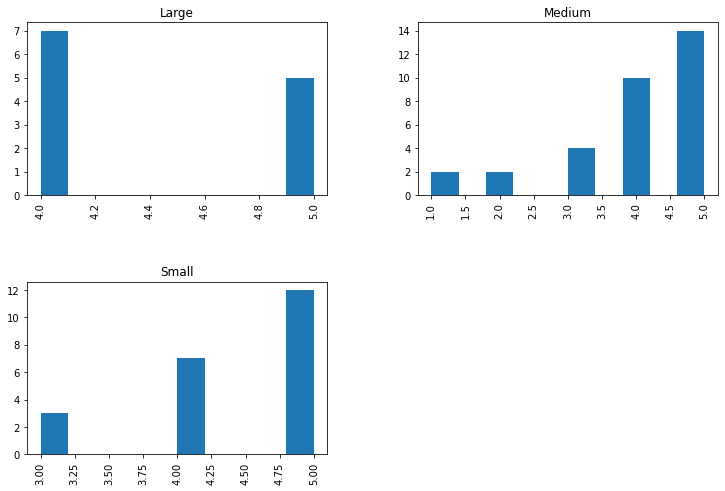

In [158]:
data02_emoji['MergedRating'].hist(by=data02_emoji['citySize'], figsize=(12, 8))

array([[<AxesSubplot:title={'center':'Expert'}>,
        <AxesSubplot:title={'center':'beginner'}>],
       [<AxesSubplot:title={'center':'intermediate'}>, <AxesSubplot:>]],
      dtype=object)

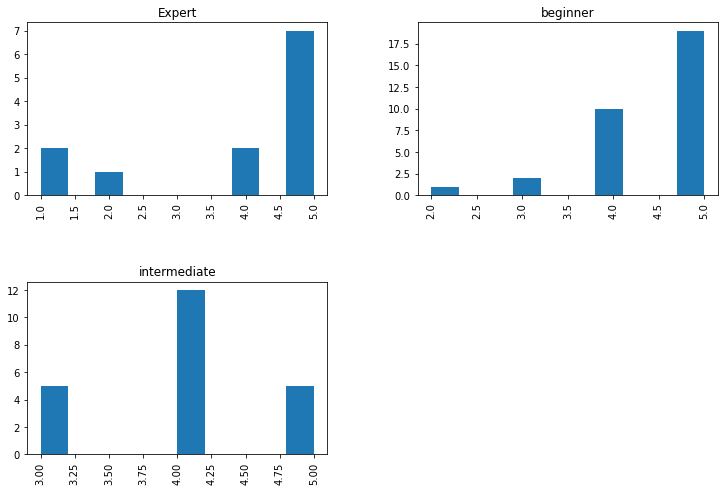

In [159]:
data02_emoji['MergedRating'].hist(by=data02_emoji['IT_Skill_level'], figsize=(12, 8))

## For individual items and the ratings have not been merged

In [ ]:
#Emoji Rating System
print('Emoji Rating System')
print()
for i in range(len(factors)):
    print('Item 1')
    print(factors[i])
    contigency1= pd.crosstab(data02_emoji['item1ratevalue'], data02_emoji[factors[i]],normalize='columns')
    #print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency1, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('Chi-statistic')
    print((c1))
    print('p-value')
    print(1-round(p1,3))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    print(round(np.sqrt(c1/len(l1)),2))
    #print(stats.chi2_contingency(contigency1))
    print('------------------------------')
    print('Item 2')
    print(factors[i])
    contigency2= pd.crosstab(data02_emoji['item2ratevalue'], data02_emoji[factors[i]],normalize='columns')
    #print(contigency2)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency2, annot=True, cmap="YlGnBu")
    #plt.show()
    c2, p2, dof_2, expected_2 = chi2_contingency(contigency2)
    print('Chi-statistic')
    print((c2))
    print('p-value')
    print(1-round(p2,3))
    print('degrees of freedom')
    print(dof_2)
    print('Effect Size')
    print(round(np.sqrt(c2/len(l1)),2))
    #print(stats.chi2_contingency(contigency2))
    print('------------------------------')

In [ ]:
#5-star Rating System
print('5-star Rating System')
print() 
for i in range(len(factors)):
    print('Item 1')
    print(factors[i])
    contigency1= pd.crosstab(data02_star['item1ratevalue'], data02_star[factors[i]],normalize='columns')
    #print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('chi-statistic')
    print(c1)
    print('This is the P-value')
    print(1-round(p1,3))
    #print(stats.chi2_contingency(contigency1))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    print(round(np.sqrt(c1/len(l2)),2))
    print('------------------------------')
    print('Item 2')
    print(factors[i])
    contigency2= pd.crosstab(data02_star['item2ratevalue'], data02_star[factors[i]],normalize='columns')
    #print(contigency2)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency, annot=True, cmap="YlGnBu")
    #plt.show()
    c2, p2, dof_2, expected_2 = chi2_contingency(contigency2)
    print('chi-statistic')
    print(c2)
    print('This is the P-value')
    print(1-round(p2,3))
    #print(stats.chi2_contingency(contigency2))
    print('degrees of freedom')
    print(dof_2)
    print('Effect Size')
    print(round(np.sqrt(c2/len(l2)),2))
    print()
    print('------------------------------')

In [ ]:
#5-point Slider Rating System
print('5-point Slider Rating System')
print()
for i in range(len(factors)):
    print('Item 1')
    print(factors[i])
    contigency1= pd.crosstab(data02_slider['item1ratevalue_m'], data02_slider[factors[i]],normalize='columns')
    #print(contigency)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('chi-statistic')
    print(c1)
    print('This is the P-value')
    print(1-round(p1,2))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    print(round(np.sqrt(c1/len(l3)),2))
    print()
    print('------------------------------')
    print('Item 2')
    print(factors[i])
    contigency2= pd.crosstab(data02_slider['item2ratevalue_m'], data02_slider[factors[i]],normalize='columns')
    #print(contigency)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency, annot=True, cmap="YlGnBu")
    #plt.show()
    c2, p2, dof_2, expected_2 = chi2_contingency(contigency2)
    print('chi-statistic')
    print(c1)
    print('This is the P-value')
    print(1-round(p2,2))
    print('degrees of freedom')
    print(dof_2)
    print('Effect Size')
    print(round(np.sqrt(c2/len(l3)),2))
    print()
    print('------------------------------')